In [1]:
import site
site.addsitedir('..')
import menpo.io as mio
import menpodetect
import numpy as np
import facefit
%matplotlib inline
from facefit import esr, ert, lbf
from facefit.test import fit_all
from facefit.test.end2end import test_model
from facefit import util

In [2]:
MODEL_NAME = "../models/esr_lfpw_helen.hkl"

In [4]:
lfpw_train = util.read_images("../datasets/lfpw/trainset/", normalise=True)
lfpw_test = util.read_images("../datasets/lfpw/testset/", normalise=True)
helen_train = util.read_images("../datasets/helen_cropped/trainset_cropped", normalise=True)
helen_test = util.read_images("../datasets/helen_cropped/testset_cropped/", normalise=True)


- Loading 330 assets: [====================] 100%

In [5]:
#train_images = np.concatenate([lfpw_train, helen_train])
test_images = np.concatenate([lfpw_test, helen_test])

In [9]:
#builder = facefit.esr.ESRBuilder(n_landmarks=68, n_stages=10, n_ferns=500, beta=1000, n_perturbations=20, compress_ferns=False)

#initial_errors, final_errors, initial_shapes, final_shapes, model = fit_all(builder, train_images, test_images, num_init=1)

Perturbing initial estimates
Size of augmented dataset: 56240 images.

Building primitive regressor 499
Built outer regressor 0

Building primitive regressor 499
Built outer regressor 1

Building primitive regressor 499
Built outer regressor 2

Building primitive regressor 499
Built outer regressor 3

Building primitive regressor 499
Built outer regressor 4

Building primitive regressor 499
Built outer regressor 5

Building primitive regressor 499
Built outer regressor 6

Building primitive regressor 499
Built outer regressor 7

Building primitive regressor 499
Built outer regressor 8

Building primitive regressor 499
Built outer regressor 9

554/554

/root/beng/facefit/esr/fern.py:26: RuntimeWarning: invalid value encountered in divide
  correlation = (cov_l_p[:, None] - cov_l_p) / np.sqrt(np.std(lengths) * (var_pp_sum - 2 * cov_pp))


In [11]:
print "Mean initial error: {}".format(np.mean(initial_errors))
print "Mean final error: {}".format(np.mean(final_errors))

Mean initial error: 0.10884353332
Mean final error: 0.0284593657943


In [6]:
import hickle
model = hickle.load("../models/esr_lfpw_helen.hkl", safe=False)

In [20]:
initial_errors, final_errors, initial_shapes, final_shapes = test_model(model, test_images, num_init=1)

224/224

In [21]:
print "Mean initial error: {}".format(np.mean(initial_errors))
print "Mean final error: {}".format(np.mean(final_errors))

Mean initial error: 0.102570194775
Mean final error: 0.0266484121616


In [14]:
%matplotlib inline

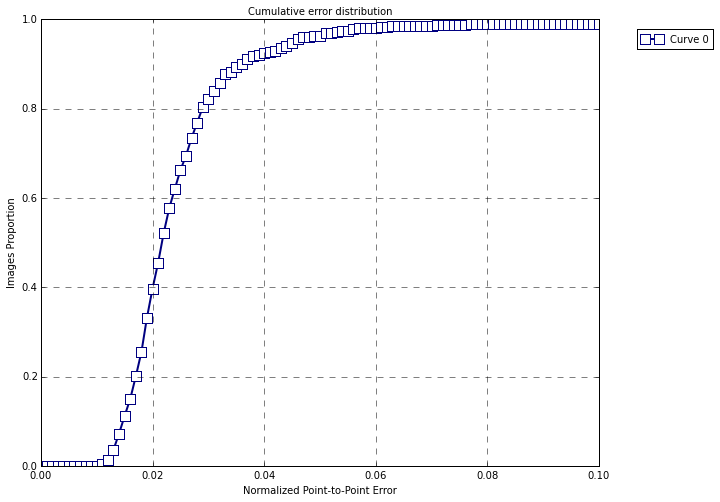

In [15]:
from menpofit.visualize import plot_ced
plot_ced(final_errors)

In [ ]:
worst = np.argmax(final_errors)
worst

In [23]:
i = worst

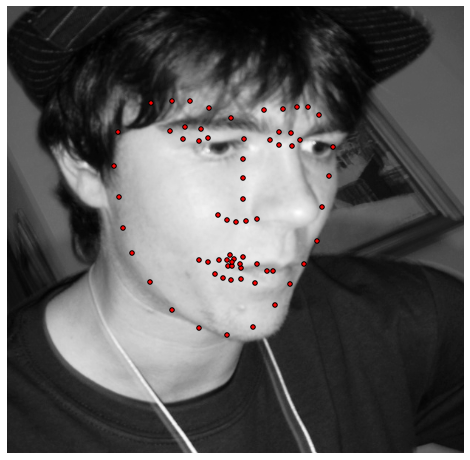

In [24]:
final_shapes[i].view()
test_images[i].view()